# Combining Two Files

In [18]:
#Functions from Obin's load_trajectories file
from load_trajectories import get_timestamps, load_trajectories, get_unique_SDs

# Using the NPL 2024a kernel
import os
import os.path

# dask
from dask_jobqueue import PBSCluster
import dask.dataframe as dd

import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt

import math

# Setting Up Dask

In [8]:
n_jobs = 8

cluster = PBSCluster(account='UCLB0041', 
                     queue='casper', 
                     memory='25GB', 
                     cores=1, 
                     processes=1, 
                     walltime='08:00:00')

cluster.scale(jobs=n_jobs) # scale up by n_jobs
client = cluster.get_client()
print(cluster.job_script())

#!/usr/bin/env bash

#PBS -N dask-worker
#PBS -q casper
#PBS -A UCLB0041
#PBS -l select=1:ncpus=1:mem=24GB
#PBS -l walltime=08:00:00

/glade/u/apps/opt/conda/envs/npl-2024a/bin/python -m distributed.cli.dask_worker tcp://128.117.208.112:44705 --nthreads 1 --memory-limit 23.28GiB --name dummy-name --nanny --death-timeout 60



In [9]:
# check that dask-workers are in queue or running (may take a couple minutes)
!qstat -u ashleyn

                                                            Req'd  Req'd   Elap
Job ID          Username Queue    Jobname    SessID NDS TSK Memory Time  S Time
--------------- -------- -------- ---------- ------ --- --- ------ ----- - -----
1431179.casper* ashleyn  htc      STDIN       52928   1   1   16gb 24:00 H   --  
1682862.casper* ashleyn  htc      STDIN       68100   1   1   25gb 08:00 R 00:10
1682864.casper* ashleyn  htc      dask-work*  69469   1   1   24gb 08:00 R 00:00
1682865.casper* ashleyn  htc      dask-work*  69486   1   1   24gb 08:00 R 00:00
1682866.casper* ashleyn  htc      dask-work*  21194   1   1   24gb 08:00 R 00:00
1682867.casper* ashleyn  htc      dask-work*  21229   1   1   24gb 08:00 R 00:00
1682868.casper* ashleyn  htc      dask-work*  21266   1   1   24gb 08:00 R 00:00
1682869.casper* ashleyn  htc      dask-work*  21305   1   1   24gb 08:00 R 00:00
1682870.casper* ashleyn  htc      dask-work*  21347   1   1   24gb 08:00 R 00:00
1682871.casper* ashleyn  htc 

In [10]:
# launch client dashboard to visualize dask diagnostics 
# click on "Launch dashboard in JupyterLab" 
client

<Client: 'tcp://128.117.208.112:44705' processes=8 threads=8, memory=186.24 GiB>

# Environmental Data File

In [19]:
dirpath = "/glade/derecho/scratch/klamb/superdroplets/outsdm_iceball_nowind_rhod_dist_min200_sgs_1024_poly_trj_5400_7200"
fn = "cm1out_only_upto35.nc"
newncfilepath = os.path.join(dirpath, fn)
print(newncfilepath)

/glade/derecho/scratch/klamb/superdroplets/outsdm_iceball_nowind_rhod_dist_min200_sgs_1024_poly_trj_5400_7200/cm1out_only_upto35.nc


In [20]:
#Opened the netcdf files into a Dataset
nc = xr.open_dataset(newncfilepath)
nc

<xarray.Dataset>
Dimensions:   (one: 1, time: 105, ni: 120, nip1: 121, nj: 120, njp1: 121,
               nk: 140, nkp1: 141)
Coordinates:
  * time      (time) timedelta64[ns] 01:26:00 01:27:00 ... 02:10:00.000488281
Dimensions without coordinates: one, ni, nip1, nj, njp1, nk, nkp1
Data variables: (12/43)
    f_cor     (one) float32 ...
    ztop      (one) float32 ...
    xh        (ni) float32 ...
    xf        (nip1) float32 ...
    yh        (nj) float32 ...
    yf        (njp1) float32 ...
    ...        ...
    out10     (time, nk, nj, ni) float32 ...
    out11     (time, nk, nj, ni) float32 ...
    out12     (time, nk, nj, ni) float32 ...
    out13     (time, nk, nj, ni) float32 ...
    out14     (time, nk, nj, ni) float32 ...
    tke       (time, nkp1, nj, ni) float32 ...
Attributes: (12/69)
    cm1 version:  cm1r19.1
    x_units:      km
    x_label:      x
    y_units:      km
    y_label:      y
    z_units:      km
    ...           ...
    cgt1:         1.875
    cgt2:         -1.25
    cgt3:         0.375
    dgt1:         2.0
    dgt2:         -3.0
    dgt3:         1.0

In [88]:
#Checks if the x position is in its original values
nc['xh'].values

array([ 0.05      ,  0.15      ,  0.25      ,  0.35000002,  0.45000002,
        0.55      ,  0.65000004,  0.75000006,  0.85      ,  0.95000005,
        1.0500001 ,  1.1500001 ,  1.25      ,  1.35      ,  1.45      ,
        1.5500001 ,  1.6500001 ,  1.7500001 ,  1.8500001 ,  1.95      ,
        2.0500002 ,  2.15      ,  2.25      ,  2.3500001 ,  2.45      ,
        2.5500002 ,  2.65      ,  2.7500002 ,  2.8500001 ,  2.95      ,
        3.0500002 ,  3.15      ,  3.2500002 ,  3.3500001 ,  3.45      ,
        3.5500002 ,  3.65      ,  3.7500002 ,  3.8500001 ,  3.9500003 ,
        4.05      ,  4.15      ,  4.25      ,  4.3500004 ,  4.4500003 ,
        4.55      ,  4.65      ,  4.75      ,  4.8500004 ,  4.9500003 ,
        5.05      ,  5.15      ,  5.2500005 ,  5.3500004 ,  5.4500003 ,
        5.55      ,  5.65      ,  5.7500005 ,  5.8500004 ,  5.9500003 ,
        6.05      ,  6.15      ,  6.2500005 ,  6.3500004 ,  6.4500003 ,
        6.55      ,  6.65      ,  6.7500005 ,  6.8500004 ,  6.95

In [21]:
# Converts time [ns] in time [seconds]
nc['time_seconds'] = nc['time'].values / np.timedelta64(1, 's')
nc['time_seconds'] = nc['time_seconds'].astype(np.int32)
nc

<xarray.Dataset>
Dimensions:       (one: 1, time: 105, ni: 120, nip1: 121, nj: 120, njp1: 121,
                   nk: 140, nkp1: 141, time_seconds: 105)
Coordinates:
  * time          (time) timedelta64[ns] 01:26:00 ... 02:10:00.000488281
  * time_seconds  (time_seconds) int32 5160 5220 5280 5340 ... 7680 7740 7800
Dimensions without coordinates: one, ni, nip1, nj, njp1, nk, nkp1
Data variables: (12/43)
    f_cor         (one) float32 ...
    ztop          (one) float32 ...
    xh            (ni) float32 ...
    xf            (nip1) float32 ...
    yh            (nj) float32 ...
    yf            (njp1) float32 ...
    ...            ...
    out10         (time, nk, nj, ni) float32 ...
    out11         (time, nk, nj, ni) float32 ...
    out12         (time, nk, nj, ni) float32 ...
    out13         (time, nk, nj, ni) float32 ...
    out14         (time, nk, nj, ni) float32 ...
    tke           (time, nkp1, nj, ni) float32 ...
Attributes: (12/69)
    cm1 version:  cm1r19.1
    x_units:      km
    x_label:      x
    y_units:      km
    y_label:      y
    z_units:      km
    ...           ...
    cgt1:         1.875
    cgt2:         -1.25
    cgt3:         0.375
    dgt1:         2.0
    dgt2:         -3.0
    dgt3:         1.0

In [30]:
#Finds the unique times in ascending order
time = nc['time_seconds'].values
sorted_time = time

np.unique(np.sort(sorted_time)) #70 unique times

array([3660, 3720, 3780, 3840, 3900, 3960, 4020, 4080, 4140, 4200, 4260,
       4320, 4380, 4440, 4500, 4560, 4620, 4680, 4740, 4800, 4860, 4920,
       4980, 5040, 5100, 5160, 5220, 5280, 5340, 5400, 5460, 5520, 5580,
       5640, 5700, 5760, 5820, 5880, 5940, 6000, 6060, 6120, 6180, 6240,
       6300, 6360, 6420, 6480, 6540, 6600, 6660, 6720, 6780, 6840, 6900,
       6960, 7020, 7080, 7140, 7200, 7260, 7320, 7380, 7440, 7500, 7560,
       7620, 7680, 7740, 7800], dtype=int32)

In [100]:
nc

<xarray.Dataset>
Dimensions:       (one: 1, time: 105, ni: 120, nip1: 121, nj: 120, njp1: 121,
                   nk: 140, nkp1: 141, time_seconds: 105)
Coordinates:
  * time          (time) timedelta64[ns] 01:26:00 ... 02:10:00.000488281
  * time_seconds  (time_seconds) int32 5160 5220 5280 5340 ... 7680 7740 7800
Dimensions without coordinates: one, ni, nip1, nj, njp1, nk, nkp1
Data variables: (12/44)
    f_cor         (one) float32 ...
    ztop          (one) float32 ...
    xh            (ni) float32 50.0 150.0 250.0 ... 1.185e+04 1.195e+04
    xf            (nip1) float32 ...
    yh            (nj) float32 50.0 150.0 250.0 ... 1.185e+04 1.195e+04
    yf            (njp1) float32 ...
    ...            ...
    out11         (time, nk, nj, ni) float32 ...
    out12         (time, nk, nj, ni) float32 ...
    out13         (time, nk, nj, ni) float32 ...
    out14         (time, nk, nj, ni) float32 ...
    tke           (time, nkp1, nj, ni) float32 ...
    air_temp      (time, nk, nj, ni) float64 294.8 294.7 294.7 ... 211.7 211.7
Attributes: (12/69)
    cm1 version:  cm1r19.1
    x_units:      km
    x_label:      x
    y_units:      km
    y_label:      y
    z_units:      km
    ...           ...
    cgt1:         1.875
    cgt2:         -1.25
    cgt3:         0.375
    dgt1:         2.0
    dgt2:         -3.0
    dgt3:         1.0

# Trajectory File

In [22]:
dirpath = '/glade/derecho/scratch/klamb/superdroplets/outsdm_iceball_nowind_rhod_dist_min200_sgs_1024_poly_trj_5400_7200'

In [23]:
# THIS HAS 15 SECONDS
# trajs = load_trajectories(dirpath,num_timesteps=10)
timestamps = get_timestamps(dirpath)

# load every 4 timestamps (every 1 minute)
coarse_timestamps = timestamps[0::4]

#coarse_timestamps = timestamps

# only look at 10 superdroplets 
Ns = 1000
unique_superdroplets = get_unique_SDs(dirpath, coarse_timestamps[0])
first_Ns = unique_superdroplets[0:Ns]
#all_Ns = unique_superdroplets

print(coarse_timestamps)
print(first_Ns)
trajs = load_trajectories(dirpath, times=coarse_timestamps,
                         num_timesteps = 36, 
                         Ns_array = first_Ns)

[5100 5160 5220 5280 5340 5400 5460 5520 5580 5640 5700 5760 5820 5880
 5940 6000 6060 6120 6180 6240 6300 6360 6420 6480 6540 6600 6660 6720
 6780 6840 6900 6960 7020 7080 7140 7200]
[   409    551    781    872   1422   1464   1934   3033   3531   3883
   4175   4632   5924   6549   7050   7071   7152   7487   8844   9128
   9188   9727  10199  10999  11079  11972  12380  12559  12856  13044
  13092  13957  14059  14176  14234  14251  14583  16717  16792  16847
  17194  17339  17342  17875  18365  18510  19122  19960  20383  20678
  20817  20937  21143  22427  23071  23102  24396  24579  25131  26461
  26779  27402  27607  27886  29102  29161  29403  29462  29541  29933
  30026  30181  31681  31810  31913  32179  32355  32357  33132  34017
  34406  34502  34654  34796  36142  36510  37086  37341  37461  37592
  37902  38100  38845  39049  39183  39532  39839  40715  40727  40823
  40853  40940  40978  41668  42113  42568  42966  42988  43010  43802
  44288  45454  45919  45963  45987

In [24]:
trajs

,x[m],y[m],z[m],vz[m],radius(droplet)[m],mass_of_aerosol_in_droplet/ice(1:01)[g],radius_eq(ice)[m],radius_pol(ice)[m],density(droplet/ice)[kg/m3],rhod [kg/m3],multiplicity[-],status[-],index,rime_mass[kg],num_of_monomers[-],time
rk_deact,,,,,,,,,,,,,,,,
409,257.08756,376.495430,9206.9901,0.0,0.0,4.152454e-13,0.000006,0.000006,202.61799,108.18,15177056256,ICE,409,0.0,1,5100
551,421.27386,208.028410,9724.6130,0.0,0.0,1.412397e-14,0.000027,0.000027,200.00263,99.55,74482008064,ICE,551,0.0,1,5100
781,417.36142,423.576800,9656.4441,0.0,0.0,7.027485e-14,0.000019,0.000019,358.66841,358.64,58047827968,ICE,781,0.0,1,5100
872,226.87752,372.240120,9514.6481,0.0,0.0,1.622385e-13,0.000045,0.000045,289.55341,289.55,35479605248,ICE,872,0.0,1,5100
1422,483.30685,37.490361,9622.7620,0.0,0.0,2.185584e-13,0.000017,0.000017,410.53663,410.45,28040101888,ICE,1422,0.0,1,5100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442036,348.42163,31.393165,9449.3631,0.0,0.0,1.948916e-13,0.000036,0.000036,424.36198,600.45,30811025408,ICE,1224062,0.0,1,7200
127773,325.18962,31.774269,9484.2812,0.0,0.0,1.904751e-13,0.000039,0.000039,249.63247,289.55,31379685376,ICE,1267516,0.0,1,7200
202773,256.19643,33.496423,9476.1270,0.0,0.0,1.246443e-13,0.000043,0.000043,275.30184,324.09,42557939712,ICE,1305192,0.0,1,7200


In [25]:
# displays only the 5160 and 5220 times since those are also the times shown in the environmental data files
trajs = trajs[trajs["time"] != 5100]
trajs

,x[m],y[m],z[m],vz[m],radius(droplet)[m],mass_of_aerosol_in_droplet/ice(1:01)[g],radius_eq(ice)[m],radius_pol(ice)[m],density(droplet/ice)[kg/m3],rhod [kg/m3],multiplicity[-],status[-],index,rime_mass[kg],num_of_monomers[-],time
rk_deact,,,,,,,,,,,,,,,,
409,260.60377,368.385200,9213.5906,0.0,0.0,4.152454e-13,0.000011,0.000011,200.59303,108.18,15177056256,ICE,409,0.0,1,5160
551,407.87111,210.440490,9741.4169,0.0,0.0,1.412397e-14,0.000027,0.000027,200.00253,99.55,74482008064,ICE,551,0.0,1,5160
781,411.10460,434.788160,9654.6669,0.0,0.0,7.027485e-14,0.000019,0.000019,357.11953,358.64,58047827968,ICE,781,0.0,1,5160
872,233.15415,383.453870,9512.1130,0.0,0.0,1.622385e-13,0.000045,0.000045,289.06606,289.55,35479605248,ICE,872,0.0,1,5160
1422,479.72596,38.228922,9674.1355,0.0,0.0,2.185584e-13,0.000019,0.000019,362.34346,410.45,28040101888,ICE,1422,0.0,1,5160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442036,348.42163,31.393165,9449.3631,0.0,0.0,1.948916e-13,0.000036,0.000036,424.36198,600.45,30811025408,ICE,1224062,0.0,1,7200
127773,325.18962,31.774269,9484.2812,0.0,0.0,1.904751e-13,0.000039,0.000039,249.63247,289.55,31379685376,ICE,1267516,0.0,1,7200
202773,256.19643,33.496423,9476.1270,0.0,0.0,1.246443e-13,0.000043,0.000043,275.30184,324.09,42557939712,ICE,1305192,0.0,1,7200


In [26]:
trajs = trajs.reset_index()
trajs

,rk_deact,x[m],y[m],z[m],vz[m],radius(droplet)[m],mass_of_aerosol_in_droplet/ice(1:01)[g],radius_eq(ice)[m],radius_pol(ice)[m],density(droplet/ice)[kg/m3],rhod [kg/m3],multiplicity[-],status[-],index,rime_mass[kg],num_of_monomers[-],time
0,409,260.60377,368.385200,9213.5906,0.0,0.0,4.152454e-13,0.000011,0.000011,200.59303,108.18,15177056256,ICE,409,0.0,1,5160
1,551,407.87111,210.440490,9741.4169,0.0,0.0,1.412397e-14,0.000027,0.000027,200.00253,99.55,74482008064,ICE,551,0.0,1,5160
2,781,411.10460,434.788160,9654.6669,0.0,0.0,7.027485e-14,0.000019,0.000019,357.11953,358.64,58047827968,ICE,781,0.0,1,5160
3,872,233.15415,383.453870,9512.1130,0.0,0.0,1.622385e-13,0.000045,0.000045,289.06606,289.55,35479605248,ICE,872,0.0,1,5160
4,1422,479.72596,38.228922,9674.1355,0.0,0.0,2.185584e-13,0.000019,0.000019,362.34346,410.45,28040101888,ICE,1422,0.0,1,5160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35010,442036,348.42163,31.393165,9449.3631,0.0,0.0,1.948916e-13,0.000036,0.000036,424.36198,600.45,30811025408,ICE,1224062,0.0,1,7200
35011,127773,325.18962,31.774269,9484.2812,0.0,0.0,1.904751e-13,0.000039,0.000039,249.63247,289.55,31379685376,ICE,1267516,0.0,1,7200
35012,202773,256.19643,33.496423,9476.1270,0.0,0.0,1.246443e-13,0.000043,0.000043,275.30184,324.09,42557939712,ICE,1305192,0.0,1,7200
35013,342273,465.68536,48.121279,9741.9327,0.0,0.0,3.921188e-13,0.000050,0.000050,200.00494,177.27,16127646720,ICE,1306165,0.0,1,7200


# Combining the Trajectory & Environmental Data Files

In [27]:
#Function appends trajs data frame with environmental data variables 
def get_environmental_vars(nc, trajs, selected_vars):
    x_index_array = np.zeros(len(trajs), dtype=int)
    y_index_array = np.zeros(len(trajs), dtype=int)
    z_index_array = np.zeros(len(trajs), dtype=int)
    coordinates = []

    #Converts the position to meters and finds the difference between the position and midpoints
    for index, row in trajs.iterrows():
        x_index_array[index] = (abs(row['x[m]']-nc['xh']* 1000).argmin())
        y_index_array[index] = (abs(row['y[m]']-nc['yh']* 1000).argmin())
        z_index_array[index] = (abs(row['z[m]']-nc['z']* 1000).argmin())

    trajs['xi gridbox'] = x_index_array
    trajs['yk gridbox'] = y_index_array
    trajs['zh gridbox'] = z_index_array

    #Appends the coordinates onto the dataframe
    for i, j, k in zip(x_index_array, y_index_array, z_index_array):
        tuple = (i, j, k)
        coordinates.append(tuple)
    
    trajs['coordinates'] = coordinates

    #Appends all of the enviromental data variables we want 
    for var in selected_vars:
        values = []
        for zk, yj, xi in zip(trajs['zh gridbox'].values, trajs['yk gridbox'].values, trajs['xi gridbox'].values):
            value = nc[var][0, zk, yj, xi].values * 1
            values.append(value)
        trajs[var] = values

    return trajs

In [28]:
selected_vars = ['rh', 'th', 'prs', 'uinterp', 'vinterp', 'winterp', 'out8', 'out9', 'out10', 'out11', 'out12', 'out13', 'out14', 'deactrat', 'qv']
trajs = get_environmental_vars(nc, trajs, selected_vars)
trajs

,rk_deact,x[m],y[m],z[m],vz[m],radius(droplet)[m],mass_of_aerosol_in_droplet/ice(1:01)[g],radius_eq(ice)[m],radius_pol(ice)[m],density(droplet/ice)[kg/m3],...,winterp,out8,out9,out10,out11,out12,out13,out14,deactrat,qv
0,409,260.60377,368.385200,9213.5906,0.0,0.0,4.152454e-13,0.000011,0.000011,200.59303,...,0.173969,35.093441,35.093441,2.529180e+05,0.071852,320.408478,9.909731,9.909731,8.849855e-09,0.000260
1,551,407.87111,210.440490,9741.4169,0.0,0.0,1.412397e-14,0.000027,0.000027,200.00253,...,0.279965,19.053123,19.053123,7.316236e+06,0.025391,402.735229,7.890838,7.890838,2.470418e-08,0.000162
2,781,411.10460,434.788160,9654.6669,0.0,0.0,7.027485e-14,0.000019,0.000019,357.11953,...,0.037081,15.339574,15.339574,1.911124e+07,0.013854,313.429932,6.316255,6.316255,6.621069e-09,0.000176
3,872,233.15415,383.453870,9512.1130,0.0,0.0,1.622385e-13,0.000045,0.000045,289.06606,...,0.027260,32.392315,32.392315,2.072895e+06,0.053458,296.343384,9.293776,9.293776,3.713165e-09,0.000195
4,1422,479.72596,38.228922,9674.1355,0.0,0.0,2.185584e-13,0.000019,0.000019,362.34346,...,0.863391,27.194090,27.194090,5.206371e+06,0.041067,309.482971,9.319333,9.319333,7.039994e-08,0.000182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35010,442036,348.42163,31.393165,9449.3631,0.0,0.0,1.948916e-13,0.000036,0.000036,424.36198,...,0.339083,25.680418,25.680418,3.036277e+06,0.036044,313.412537,9.889471,9.889471,2.298367e-08,0.000217
35011,127773,325.18962,31.774269,9484.2812,0.0,0.0,1.904751e-13,0.000039,0.000039,249.63247,...,0.339083,25.680418,25.680418,3.036277e+06,0.036044,313.412537,9.889471,9.889471,2.298367e-08,0.000217
35012,202773,256.19643,33.496423,9476.1270,0.0,0.0,1.246443e-13,0.000043,0.000043,275.30184,...,0.073028,20.105789,20.105789,4.210766e+06,0.023421,327.493896,8.077277,8.077277,9.825553e-09,0.000214
35013,342273,465.68536,48.121279,9741.9327,0.0,0.0,3.921188e-13,0.000050,0.000050,200.00494,...,0.742397,29.907600,29.907600,3.215708e+06,0.054477,355.095856,7.419420,7.419420,5.098589e-08,0.000166


# Calculating Air Temperature

In [12]:
#Specific gas constant for dry air, measured in J/(kg*K)
rd = 287.0 

#Specific heat capacity at constant pressure for dry air, measured in J/(kg*K)
cp = 1004.0

#Reference pressure
p00 = 100000.0

#Ratio of the gas constant to the specific heat capacity at constant pressure
rovcp  = rd/cp
trajs['air_temp'] = trajs['th'].values * (trajs['prs'].values / p00 ) ** (rovcp)
trajs

,rk_deact,x[m],y[m],z[m],vz[m],radius(droplet)[m],mass_of_aerosol_in_droplet/ice(1:01)[g],radius_eq(ice)[m],radius_pol(ice)[m],density(droplet/ice)[kg/m3],...,out8,out9,out10,out11,out12,out13,out14,deactrat,qv,air_temp
0,409,260.60377,368.385200,9213.5906,0.0,0.0,4.152454e-13,0.000011,0.000011,200.59303,...,35.093441,35.093441,2.529180e+05,0.071852,320.408478,9.909731,9.909731,8.849855e-09,0.000260,232.874072
1,551,407.87111,210.440490,9741.4169,0.0,0.0,1.412397e-14,0.000027,0.000027,200.00253,...,19.053123,19.053123,7.316236e+06,0.025391,402.735229,7.890838,7.890838,2.470418e-08,0.000162,228.357277
2,781,411.10460,434.788160,9654.6669,0.0,0.0,7.027485e-14,0.000019,0.000019,357.11953,...,15.339574,15.339574,1.911124e+07,0.013854,313.429932,6.316255,6.316255,6.621069e-09,0.000176,229.285610
3,872,233.15415,383.453870,9512.1130,0.0,0.0,1.622385e-13,0.000045,0.000045,289.06606,...,32.392315,32.392315,2.072895e+06,0.053458,296.343384,9.293776,9.293776,3.713165e-09,0.000195,230.253636
4,1422,479.72596,38.228922,9674.1355,0.0,0.0,2.185584e-13,0.000019,0.000019,362.34346,...,27.194090,27.194090,5.206371e+06,0.041067,309.482971,9.319333,9.319333,7.039994e-08,0.000182,229.363315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35010,442036,348.42163,31.393165,9449.3631,0.0,0.0,1.948916e-13,0.000036,0.000036,424.36198,...,25.680418,25.680418,3.036277e+06,0.036044,313.412537,9.889471,9.889471,2.298367e-08,0.000217,231.242809
35011,127773,325.18962,31.774269,9484.2812,0.0,0.0,1.904751e-13,0.000039,0.000039,249.63247,...,25.680418,25.680418,3.036277e+06,0.036044,313.412537,9.889471,9.889471,2.298367e-08,0.000217,231.242809
35012,202773,256.19643,33.496423,9476.1270,0.0,0.0,1.246443e-13,0.000043,0.000043,275.30184,...,20.105789,20.105789,4.210766e+06,0.023421,327.493896,8.077277,8.077277,9.825553e-09,0.000214,231.159470
35013,342273,465.68536,48.121279,9741.9327,0.0,0.0,3.921188e-13,0.000050,0.000050,200.00494,...,29.907600,29.907600,3.215708e+06,0.054477,355.095856,7.419420,7.419420,5.098589e-08,0.000166,228.388716


In [15]:
# Calculating Mass

radius_eq = trajs['radius_eq(ice)[m]'].values
density_droplet = trajs['density(droplet/ice)[kg/m3]'].values

volume_particle = ((4/3) * math.pi * (radius_eq **3))
mass = density_droplet * volume_particle

trajs['Mass of Particle (kg/m^2)'] = mass
trajs

,rk_deact,x[m],y[m],z[m],vz[m],radius(droplet)[m],mass_of_aerosol_in_droplet/ice(1:01)[g],radius_eq(ice)[m],radius_pol(ice)[m],density(droplet/ice)[kg/m3],...,out12,out13,out14,deactrat,qv,air_temp,RH_ice,RH_liquid,RH_diff,Mass of Particle (kg/m^2)
0,409,260.60377,368.385200,9213.5906,0.0,0.0,4.152454e-13,0.000011,0.000011,200.59303,...,320.408478,9.909731,9.909731,8.849855e-09,0.000260,232.874072,1.039520,0.698405,0.008675,9.927329e-13
1,551,407.87111,210.440490,9741.4169,0.0,0.0,1.412397e-14,0.000027,0.000027,200.00253,...,402.735229,7.890838,7.890838,2.470418e-08,0.000162,228.357277,1.016374,0.651829,0.008795,1.691870e-11
2,781,411.10460,434.788160,9654.6669,0.0,0.0,7.027485e-14,0.000019,0.000019,357.11953,...,313.429932,6.316255,6.316255,6.621069e-09,0.000176,229.285610,1.005164,0.650859,0.008636,1.016444e-11
3,872,233.15415,383.453870,9512.1130,0.0,0.0,1.622385e-13,0.000045,0.000045,289.06606,...,296.343384,9.293776,9.293776,3.713165e-09,0.000195,230.253636,1.006545,0.658299,0.008590,1.084901e-10
4,1422,479.72596,38.228922,9674.1355,0.0,0.0,2.185584e-13,0.000019,0.000019,362.34346,...,309.482971,9.319333,9.319333,7.039994e-08,0.000182,229.363315,1.031513,0.668456,0.008867,1.003702e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35010,442036,348.42163,31.393165,9449.3631,0.0,0.0,1.948916e-13,0.000036,0.000036,424.36198,...,313.412537,9.889471,9.889471,2.298367e-08,0.000217,231.242809,1.017619,0.672354,0.008626,8.303631e-11
35011,127773,325.18962,31.774269,9484.2812,0.0,0.0,1.904751e-13,0.000039,0.000039,249.63247,...,313.412537,9.889471,9.889471,2.298367e-08,0.000217,231.242809,1.017619,0.672354,0.008626,6.203812e-11
35012,202773,256.19643,33.496423,9476.1270,0.0,0.0,1.246443e-13,0.000043,0.000043,275.30184,...,327.493896,8.077277,8.077277,9.825553e-09,0.000214,231.159470,1.009730,0.666571,0.008555,8.973860e-11
35013,342273,465.68536,48.121279,9741.9327,0.0,0.0,3.921188e-13,0.000050,0.000050,200.00494,...,355.095856,7.419420,7.419420,5.098589e-08,0.000166,228.388716,1.036263,0.664801,0.008968,1.016804e-10


# Calculating the Relative Humidity with respect to liquid OR ice

In [17]:
def calculate_rh(T, P, qv, TYPE):
    # Constants for ice
    a0i = 6.11147274
    a1i = 0.503160820
    a2i = 0.188439774e-1
    a3i = 0.420895665e-3
    a4i = 0.615021634e-5
    a5i = 0.602588177e-7
    a6i = 0.385852041e-9
    a7i = 0.146898966e-11
    a8i = 0.252751365e-14

    # Constants for liquid
    a0 = 6.11239921
    a1 = 0.443987641
    a2 = 0.142986287e-1
    a3 = 0.264847430e-3
    a4 = 0.302950461e-5
    a5 = 0.206739458e-7
    a6 = 0.640689451e-10
    a7 = -0.952447341e-13
    a8 = -0.976195544e-15

    dt = np.maximum(-80., T - 273.16)
    rd = 287.04
    rv = 461.5
    eps = rd/rv
    if TYPE == 1:  # Ice
        polysvp = a0i + dt*(a1i+dt*(a2i+dt*(a3i+dt*(a4i+dt*(a5i+dt*(a6i+dt*(a7i+a8i*dt)))))))
    elif TYPE == 0:  # Liquid
        polysvp = a0 + dt*(a1+dt*(a2+dt*(a3+dt*(a4+dt*(a5+dt*(a6+dt*(a7+a8*dt)))))))
    polysvp = polysvp * 100.
    rh_out = qv / (eps * polysvp /(P-polysvp))
    return rh_out

trajs['RH_ice'] = calculate_rh(trajs['air_temp'], trajs['prs'], trajs['qv'], 1)
trajs['RH_liquid'] = calculate_rh(trajs['air_temp'], trajs['prs'], trajs['qv'], 0)
trajs['RH_diff'] = trajs['RH_liquid'] - trajs['rh']

trajs

trajs.to_csv('Trajs_NS_1000.csv')

,rk_deact,x[m],y[m],z[m],vz[m],radius(droplet)[m],mass_of_aerosol_in_droplet/ice(1:01)[g],radius_eq(ice)[m],radius_pol(ice)[m],density(droplet/ice)[kg/m3],...,out12,out13,out14,deactrat,qv,air_temp,RH_ice,RH_liquid,RH_diff,Mass of Particle (kg/m^2)
0,409,260.60377,368.385200,9213.5906,0.0,0.0,4.152454e-13,0.000011,0.000011,200.59303,...,320.408478,9.909731,9.909731,8.849855e-09,0.000260,232.874072,1.039520,0.698405,0.008675,9.927329e-13
1,551,407.87111,210.440490,9741.4169,0.0,0.0,1.412397e-14,0.000027,0.000027,200.00253,...,402.735229,7.890838,7.890838,2.470418e-08,0.000162,228.357277,1.016374,0.651829,0.008795,1.691870e-11
2,781,411.10460,434.788160,9654.6669,0.0,0.0,7.027485e-14,0.000019,0.000019,357.11953,...,313.429932,6.316255,6.316255,6.621069e-09,0.000176,229.285610,1.005164,0.650859,0.008636,1.016444e-11
3,872,233.15415,383.453870,9512.1130,0.0,0.0,1.622385e-13,0.000045,0.000045,289.06606,...,296.343384,9.293776,9.293776,3.713165e-09,0.000195,230.253636,1.006545,0.658299,0.008590,1.084901e-10
4,1422,479.72596,38.228922,9674.1355,0.0,0.0,2.185584e-13,0.000019,0.000019,362.34346,...,309.482971,9.319333,9.319333,7.039994e-08,0.000182,229.363315,1.031513,0.668456,0.008867,1.003702e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35010,442036,348.42163,31.393165,9449.3631,0.0,0.0,1.948916e-13,0.000036,0.000036,424.36198,...,313.412537,9.889471,9.889471,2.298367e-08,0.000217,231.242809,1.017619,0.672354,0.008626,8.303631e-11
35011,127773,325.18962,31.774269,9484.2812,0.0,0.0,1.904751e-13,0.000039,0.000039,249.63247,...,313.412537,9.889471,9.889471,2.298367e-08,0.000217,231.242809,1.017619,0.672354,0.008626,6.203812e-11
35012,202773,256.19643,33.496423,9476.1270,0.0,0.0,1.246443e-13,0.000043,0.000043,275.30184,...,327.493896,8.077277,8.077277,9.825553e-09,0.000214,231.159470,1.009730,0.666571,0.008555,8.973860e-11
35013,342273,465.68536,48.121279,9741.9327,0.0,0.0,3.921188e-13,0.000050,0.000050,200.00494,...,355.095856,7.419420,7.419420,5.098589e-08,0.000166,228.388716,1.036263,0.664801,0.008968,1.016804e-10


# Summary Statistics (Visualizations)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


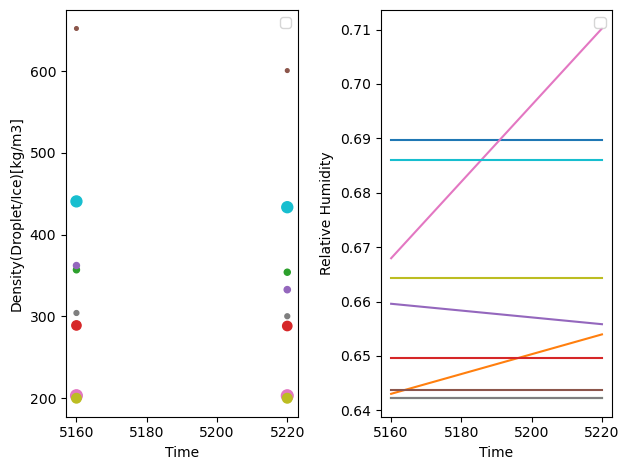

In [116]:
#Density x Deposition Density x Time

unique_droplet = np.unique(trajs['rk_deact'].values)

fig, (ax1, ax2) = plt.subplots(1, 2)

for droplet in unique_droplet:
    time = trajs['time'].loc[trajs['rk_deact'] == droplet]
    density = trajs["density(droplet/ice)[kg/m3]"].loc[trajs['rk_deact'] == droplet]
    relative_humidity = trajs["rh"].loc[trajs['rk_deact'] == droplet]
    # depositionDensity =  trajs["rhod [kg/m3]"].loc[trajs['rk_deact'] == droplet]
    rads = 1e6 * trajs["radius_eq(ice)[m]"].loc[trajs['rk_deact'] == droplet]

    #plot
    ax1.set_ylabel("Density(Droplet/Ice)[kg/m3]")
    ax1.set_xlabel("Time")
    ax1.scatter(time, density, marker="o", s=rads)

    ax2.set_ylabel('Relative Humidity')
    ax2.set_xlabel("Time")
    ax2.plot(time, relative_humidity)

ax1.legend()
ax2.legend()

plt.tight_layout()


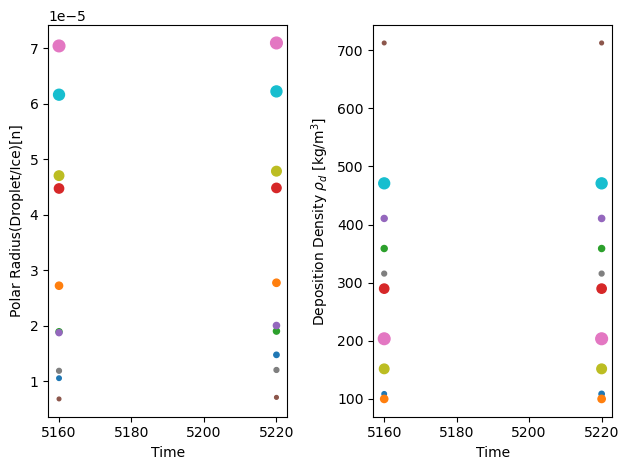

In [117]:
# Radius x Time
unique_droplet = np.unique(trajs['rk_deact'].values)

fig, (ax1, ax2) = plt.subplots(1, 2)

for droplet in unique_droplet:
    time = trajs["time"].loc[trajs['rk_deact'] == droplet]
    radius = trajs["radius_pol(ice)[m]"].loc[trajs['rk_deact'] == droplet]
    rads = 1e6 * trajs["radius_pol(ice)[m]"].loc[trajs['rk_deact'] == droplet]
    depositionDensity =  trajs["rhod [kg/m3]"].loc[trajs['rk_deact'] == droplet]

    #plot
    ax1.set_ylabel("Polar Radius(Droplet/Ice)[n]")
    ax1.set_xlabel("Time")
    ax1.scatter(time, radius, marker="o", s=rads)

    ax2.set_ylabel('Deposition Density $\\rho_d$ [kg/m$^3$]')
    ax2.set_xlabel("Time")
    ax2.scatter(time, depositionDensity, marker="o", s=rads)
    
plt.tight_layout()
plt.show()

In [ ]:
len(np.unique(trajs['time'].values))

In [ ]:
unique_droplet = np.unique(trajs['rk_deact'].values)

for droplet in unique_droplet:
    time = trajs["time"].loc[trajs['rk_deact'] == droplet]
    mass = trajs['Mass of Particle (kg/m^2)'].loc[trajs['rk_deact'] == droplet]
    plt.scatter(time, mass, marker="o", s=rads)

In [ ]:
# #Finding the distance each superdroplet traveled in respect to time
unique_droplet = np.unique(trajs['rk_deact'].values)
distance_list = []

def calculate_distance(x1, y1, z1, x2, y2, z2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)

# Iterate over each unique droplet
for droplet in unique_droplet:
    droplet_data = trajs[trajs['rk_deact'] == droplet]
    
    # Sort by timestep to ensure correct order
    droplet_data = droplet_data.sort_values(by='time')
    
    # Iterate over each timestep to calculate distance
    for i in range(len(droplet_data) - 1):
        x1, y1, z1 = droplet_data.iloc[i][['x[m]', 'y[m]', 'z[m]']]
        x2, y2, z2 = droplet_data.iloc[i + 1][['x[m]', 'y[m]', 'z[m]']]
        distance = calculate_distance(x1, y1, z1, x2, y2, z2)
        distance_list.append({
            'droplet': droplet,
            'timestep_start': droplet_data.iloc[i]['time'],
            'timestep_end': droplet_data.iloc[i + 1]['time'],
            'distance': distance
        })

distance_df = pd.DataFrame(distance_list)

print(distance_df)